In [91]:
import os
import pandas as pd
import numpy
import pickle
import scipy as sp
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
import missingno as msno
import sklearn as sk
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

In [92]:
with open('vrabes_preprocessed.pkl','rb') as f:
    pre = pickle.load(f)

In [93]:
ses_01_as = pre['ses-01_as']
ses_01_demo = pre['ses-01_demo']
ses_01_crf = pre['ses-01_crf']
ses_01_hrv = pre['ses-01_hrv']

In [94]:
ses_01 = pd.concat([ses_01_demo,ses_01_as,ses_01_hrv], axis=1)

In [95]:
y = ses_01['ses-01_group'].to_numpy()
x = ses_01.drop(['ses-01_group'],axis =1).to_numpy()

In [96]:
# feature selection
feat_sel = SelectKBest(f_classif, k=3)
x_selected = feat_sel.fit_transform(x,y)
print('선택된 변수: ', feat_sel.get_feature_names_out())

선택된 변수:  ['x14' 'x15' 'x16']


c:\Users\USER\anaconda3\envs\main\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 25  26  27  43  61  62  63  79  97  98  99 115 133 134 135 151 169 170
 171 187 205 206 207 223 241 242 243 259 277 278 279 295 313 314 315 331
 349 350 351 367] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\USER\anaconda3\envs\main\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [97]:
# standardization
scaler = StandardScaler()
scaler.fit(x_selected)
x_transformed = scaler.transform(x_selected)

In [98]:
# model
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_transformed,y)
print('예측 : ', clf.predict(x_transformed)[:3])
print('학습정확도: ', clf.score(x_transformed,y))

예측 :  [0. 0. 0.]
학습정확도:  0.8360655737704918


In [99]:
confusion_matrix(y,clf.predict(x_transformed))

array([[30,  0],
       [10, 21]], dtype=int64)

In [100]:
fpr, tpr, thresholds = roc_curve(y,clf.predict_proba(x_transformed)[:,1])

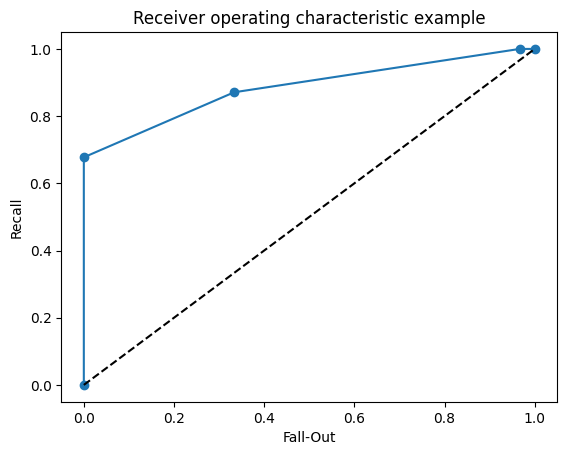

In [102]:
plt.plot(fpr, tpr, 'o-', label="Decision Tree")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
# plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.show()